In [512]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

# Problem 1

1a) Generate random symmetric matrix; find eigenvalues/eigenvectors.

In [823]:
m = 10
A = np.random.rand(m,m) #generate random matrix A
A = 1/2*(A+A.T) #Make A hermitian (real eigenvalues)

#Find true eigenvalues/vectors
eigval_true,eigvec_true = np.linalg.eig(A)

# print("True eigenvalues = ",eigval_true,"\n\n","True eigenvalues = ",eigvec_true)

1b) Power iterations

Largest eigenvalue by power iteration is 5.23480.
Actual largest eigenvalue is 5.23480.


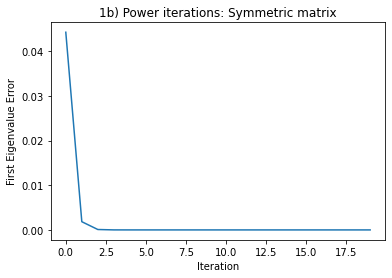

In [837]:
# Initial eigenvector guess:
w = np.random.rand(m)
v = w / np.linalg.norm(w) #normalize

l,err=[],[]
x=range(20)
for k in x:
    w = A @ v #Apply A to v
    v = w / np.linalg.norm(w) #normalize
    
    lam = v.T @ A @ v #estimate eigenvalue
    
    l.append(lam) #append to list
    err.append(abs(lam - eigval_true[0])) #calculate distance to true eigenvalue & append

print("Largest eigenvalue by power iteration is {:.5f}.\nActual largest eigenvalue is {:.5f}.".format(lam,eigval_true[0]))
    
#Plot convergence of lam to actual eigenvalue:
plt.title("1b) Power iterations: Symmetric matrix")
plt.plot(range(20),err)
plt.ylabel("First Eigenvalue Error")
plt.xlabel("Iteration")
plt.show()

1c) Rayleigh Quotient iterations

Discussion:
I start by guessing the matrix of eigenvectors V equal to A. I factor V = QR, then use the first column of Q as my first eigenvector guess. Through Raleigh Quotient iteration, I converge on the actual first eigenvector/eigenvalue pair. Then, I replace the first column of V with the calculated eigenvector and use QR decomp. to determine a new orthonormal subspace Q. Then, take the next column of Q (which is already orthogonal to the other eigenvectors) as the eigenvector guess for the next iteration and repeat "m" times until all eigenvectors/eigenvalues are found.

This method converges to the correct eigenvectors very quickly, as seen in the figure below. After 2-3 iterations, the eigenvalues are pretty darn close.

Eigenvalues calculated via Rayleigh Quotient Iteration:
[-1.26057175 -0.90157611 -0.44737385 -0.24528899 -0.0175153   0.2261048
  0.35590415  0.60628453  0.91037333  5.23479959]

True eigenvalues:
[-1.26057175 -0.90157611 -0.44737385 -0.24528899 -0.0175153   0.2261048
  0.35590415  0.60628453  0.91037333  5.23479959]


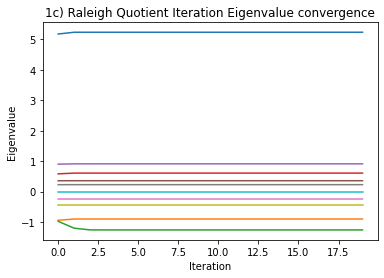

In [839]:
#1c) Rayleigh Quotient iterations
eigvals = []
V=A.copy()
Q,R = np.linalg.qr(V)
for i in range(m): #for each eigenvalue
# Initial guesses: 
    w = Q[:,i] #eigenvector guess from orthonormal matrix Q
    v = w / np.linalg.norm(w) #normalize
    lam= v.T @ A @ v #first eigenvalue guess
    
    l=[]
    x = range(20)
    for k in x:
        w = np.linalg.inv(A - lam*np.eye(m)) @ v
        v = w / np.linalg.norm(w)
        lam = v.T @ A @ v
        l.append(lam)
    plt.plot(x,l)  #Plot the eigenvalue guess through the iterations
    V[:,i] = v #update V
    eigvals.append(lam) #update eigvals
    Q,R = np.linalg.qr(V) #find new orthonormal subspace

#### Tools for me to check my work. Uncomment to compare my answers to the true values
#     print("Eigval",i," = ",lam,np.isclose(eigval_true,lam).any(),np.isclose(abs(eigvec_true),abs(v)).any())
# V = V.reshape(m,m) #Change shape to match eigvec_true
# print("\n\nCompare Eigenvalues:\n",np.sort(eigvals),"\n",np.sort(eigval_true)) #Check eigenvectors are correct
# print("\n\nCompare Eigenvectors:\n",V,"\n\n",eigvec_true)

print("Eigenvalues calculated via Rayleigh Quotient Iteration:\n{}\n\nTrue eigenvalues:\n{}".format(np.sort(eigvals),np.sort(eigval_true)))

plt.title("1c) Raleigh Quotient Iteration Eigenvalue convergence")
plt.ylabel("Eigenvalue")
plt.xlabel("Iteration")
plt.show()

1d) Random, non-symetric matrix

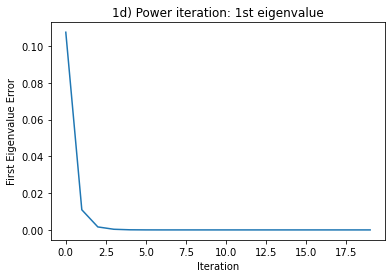

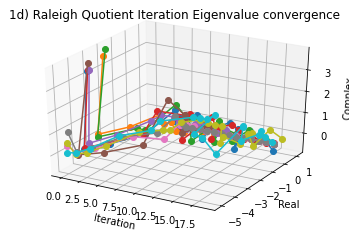

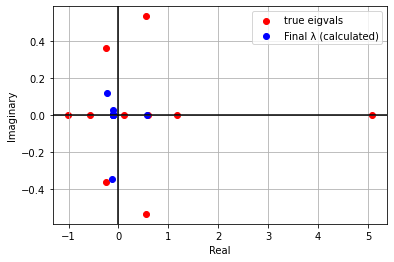

In [818]:
#1d)
m=10
A=np.random.rand(m,m)
eigval_true,eigvec_true = np.linalg.eig(A)
ereal = eigval_true.real
eimag = eigval_true.imag



####### b) Power iteration ########
w = np.random.rand(m)
v = w / np.linalg.norm(w) #normalize
l,err=[],[]
x=range(20)
for k in x:
    w = A @ v 
    v = w / np.linalg.norm(w)
    lam = v.T @ A @ v
    l.append(lam)
    err.append(abs(lam - eigval_true[0]))

plt.title("1d) Power iteration: 1st eigenvalue")
plt.plot(x,err)
plt.ylabel("First Eigenvalue Error")
plt.xlabel("Iteration")
plt.show()
###################################



##### c) Rayleigh Quotient Iterations ##########
#This time, we will make our guesses complex to try to converge on complex eigenvalues.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

eigvals = []
V=A+0.1j*np.ones((m,m))  #MAKE V GUESSES COMPLEX
Q,R = np.linalg.qr(V)
for i in range(m): #for each eigenvalue
# Initial guesses: 
    w = Q[:,i] #eigenvector guess from orthonormal matrix Q
    v = w / np.linalg.norm(w) #normalize
    lam= v.T @ A @ v #first eigenvalue guess
    l=[]
    x = range(20)
    for k in x:
        w = np.linalg.inv(A - lam*np.eye(m)) @ v
        v = w / np.linalg.norm(w)
        lam = v.T @ A @ v
        l.append(lam)
    ax.plot(x,np.array(l).real,np.array(l).imag, marker = 'o')  #Plot the eigenvalue guess through the iterations
    V[:,i] = v #update V
    eigvals.append(lam) #update eigvals
    Q,R = np.linalg.qr(V) #find new orthonormal subspace

plt.title("1d) Raleigh Quotient Iteration Eigenvalue convergence")
ax.set_ylabel("Real")
ax.set_xlabel("Iteration")
ax.set_zlabel("Complex")
plt.show()

###############################################



### Plot complex eigenvalues
fig,ax = plt.subplots()
ax.scatter(ereal,eimag,color="r",label = "true eigvals") 
ax.scatter(np.array(eigvals).real,np.array(eigvals).imag,color="b",label="Final \u03BB (calculated)")
ax.grid(True,which='both')
ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")
plt.show()

1d) Discussion:
Power iteration still works to find the first (real) eigenvalue, even if the matrix is not symmetric.

However, even using complex initial eigenvector guesses, the algorithm can not converge on the remaining complex eigenvectors.

# Problem 2)

In [660]:
#Construct data matrix A from Yale faces:
A=[]
for (dirpath,dirs,files) in  os.walk('yalefaces_cropped\\CroppedYale'):
    for fn in files:
        img = cv.imread('yalefaces_cropped\\CroppedYale\\'+fn[:7]+'\\'+fn)[:,:,0] #just read first layer, since it's grayscale so all layers are the same
        A.append(img.flatten())

imgshape = img.shape #image size in pixels
A = np.array(A)
A=A.T #Transpose A so each image is a column instead of a row

avgFace= np.mean(A,axis=1) #Find the average face
avgFace = avgFace.reshape((len(avgFace),1)) #Reshape to col. vector
A = A - avgFace #subtract mean face from each face in A

Problem 2a) Power iterations of the correlation matrix find the correct leading eigenvector & eigenvalue, which are equal to the largest singular value and first column of U.

In [663]:
#Create correlation matrix C, and find SVD
C = A.T @ A
eigval_true,eigvec_true = np.linalg.eig(C) #True Eigenvectors/values
U,S,Vt = np.linalg.svd(C,full_matrices=False) #SVD(C)

λ = σ?: True
v = u?:  [ True  True  True ...  True  True  True]


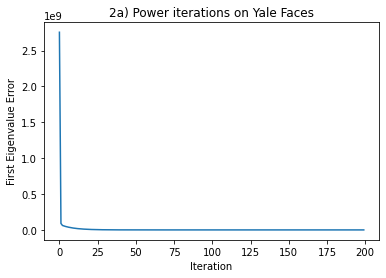

In [814]:
# Initial eigenvector guess:
w = np.random.rand(C.shape[0])
v = w / np.linalg.norm(w) #normalize

l=[]
err=[]
x=range(200)
for k in x:
    w = C @ v 
    v = w / np.linalg.norm(w)
    
    lam = v.T @ C @ v
    l.append(lam)
    err.append(abs(lam - eigval_true[0])) #track error over iteration

#Checking my work: (will print "True" if values are equal)
print("\u03BB = \u03C3?:",np.isclose(lam,S[0])) #Compare to leading mode of SVD
print("v = u?: ",np.isclose(abs(v),abs(U[:,0]))) #Compare eigenvec to first eigenface of U (absolute value)

#Plot error in first eigenvalue calculation as function of iteration.
plt.plot(x,err)
plt.title("2a) Power iterations on Yale Faces")
plt.ylabel("First Eigenvalue Error")
plt.xlabel("Iteration")
plt.show()



Problem 2b) Random Projection SVD

In [770]:
#2b) Random Projection SVD
#Economy SVD to get true values for Yale Faces Matrix
U_true,S_true,VT_true = np.linalg.svd(A,full_matrices=False) 

m,n = A.shape
k=200; #Number of random samples

#Stage A)
Omega = np.random.rand(n,k); #Compute Omega: random projection matrix
Y = A @ Omega #Create Y matrix 
Q,R = np.linalg.qr(Y) #QR decompose Y

#Stage B):
B = Q.T @ A  #Compute B
Ub,Sb,VTb = np.linalg.svd(B) #SVD(B)

#ANSWERS: 
Utilda = Q @ Ub
Stilda = Sb
VTtilda = VTb

#These answers can be checked in the following section:

Part 2c) Compare Randomized modes (red) to true modes (blue) as a function of k. If the randomized SVD is doing a good job capturing the mode, the red and blue plots will overlap perfectly.

By k~200, the first mode is effectively identical, and it only gets better as k increases. The singular value decay sticks closely to the true value for most of the nodes, but deviates towards the end.

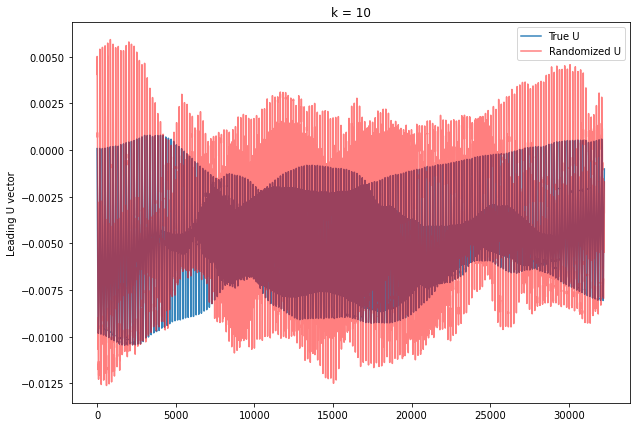

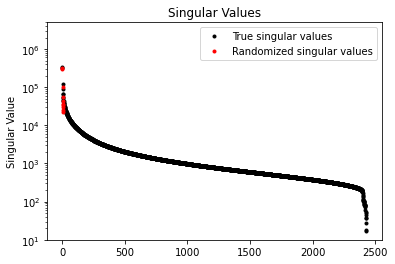

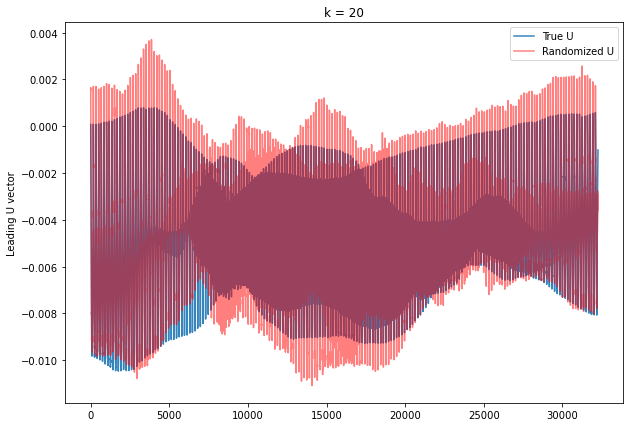

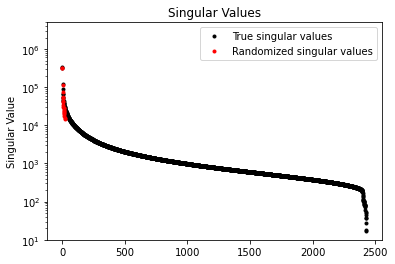

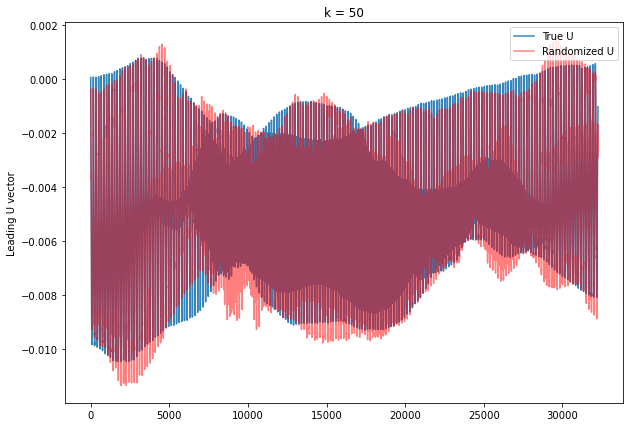

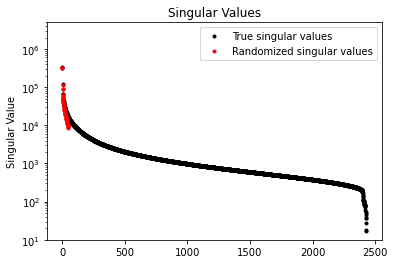

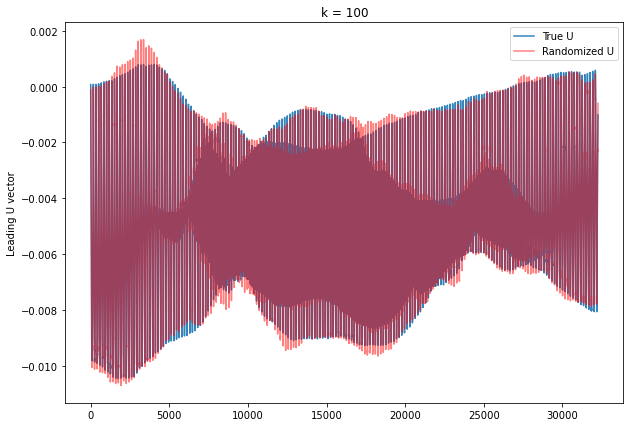

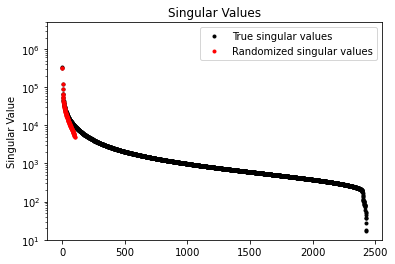

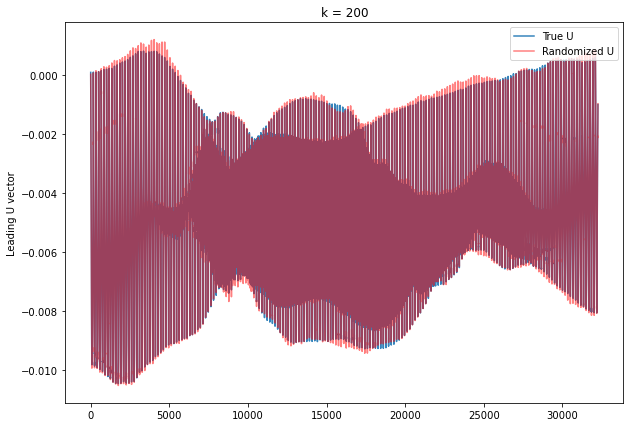

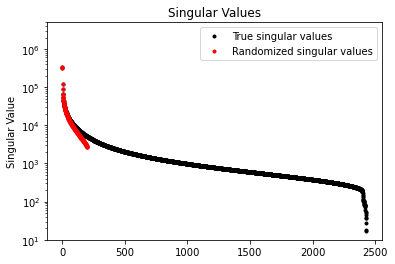

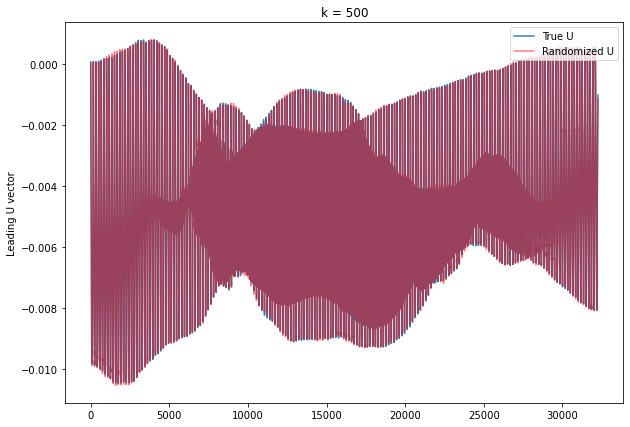

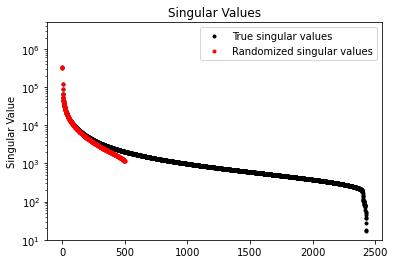

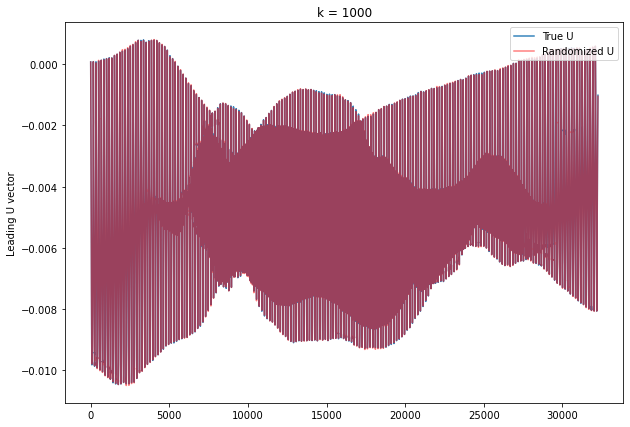

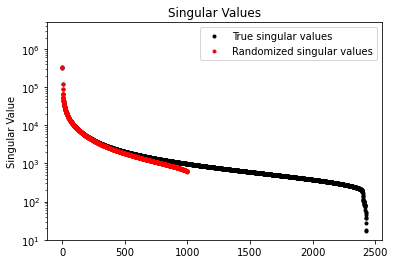

In [813]:
m,n = A.shape
for k in [10,20,50,100,200,500,1000]:
    Omega = np.random.rand(n,k);
    Y = A @ Omega
    Q,R = np.linalg.qr(Y) #QR decompose Y
    B = Q.T @ A 
    Ub,Sb,VTb = np.linalg.svd(B) #SVD(B)
    Utilda = Q @ Ub
    
    if np.sign(np.mean(U_true[:,0])) != np.sign(np.mean(Utilda[:,0])): #sometimes the sign is off from the true value. This corrects for that
        Utilda = -Utilda
    
    #Plot a mode of U
    mode = 0
    fig = plt.figure(figsize=(10,7))
    plt.plot(range(U_true.shape[0]),U_true[:,mode],label="True U",alpha=0.9)
    plt.plot(range(Utilda.shape[0]),Utilda[:,mode],color='r',label="Randomized U",alpha=0.5)
    plt.ylabel("Leading U vector")
    plt.title("k = "+str(k))
    plt.legend(loc="upper right")
    plt.show()
    
    #Plot Singular values
    plt.plot(range(len(S_true)),S_true,'k.',label='True singular values')
    plt.plot(range(len(Sb)),Sb,'r.',label='Randomized singular values')
    plt.yscale('log')
    plt.ylim(10,5*10**6)
    plt.title('Singular Values')
    plt.ylabel('Singular Value')
    plt.legend(loc="upper right")
    plt.show()